# Rotation peaks

## Rotation period from fit to peaks in ACF
Let's try to estimate the stellar rotation period from a TESS [(Ricker et al. 2014)](https://ui.adsabs.harvard.edu/abs/2014SPIE.9143E..20R/abstract) light curve of TOI-4641 ([Bieryla et al. 2024, the transits from the planet have been removed](https://ui.adsabs.harvard.edu/abs/2024MNRAS.52710955B/abstract)). 

As before we'll read in the data and fill gaps (TESS downlinks). Here we'll also find the largest continuous chunk of data and use that as the maximum rotation period we'll search for.

/Users/emilkn/anaconda3/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/emilkn/anaconda3/envs/main/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Found 2 chunks with gaps exceeding 5 days:
Chunk 0: 23.76 days
Chunk 1: 76.75 days
Longest continous timeseries: 76.75 days


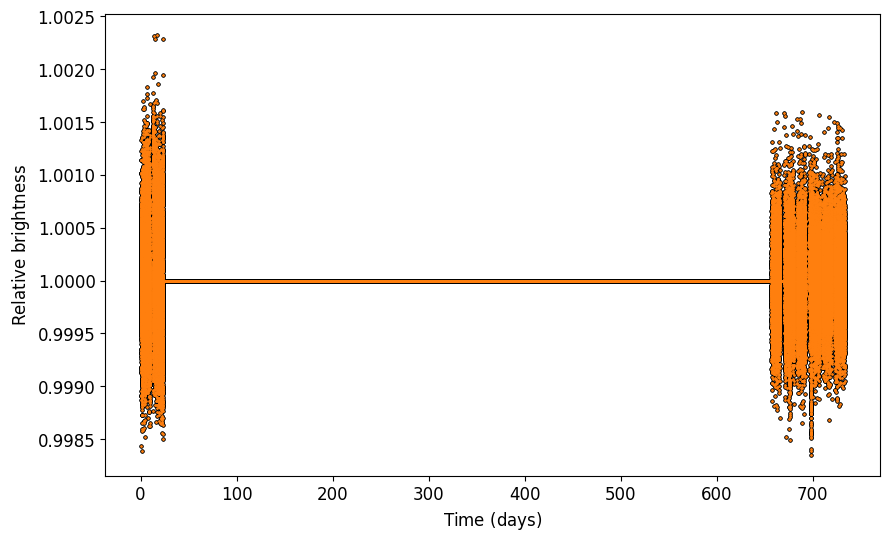

In [1]:
import coPsi
## Instantiate Data
dat = coPsi.Data()
## Read in data file
dat.readData('lc_toi4641.txt')
## Plot the data and return the axis
ax = dat.plotData(return_ax=1)

## Let's find the largest continuous chunk of data
## by default, this will be the maximum rotation period we'll search for
dat.maxTime()
## But let's just be a bit conservative and set it to 23 days
dat.maxT = 23

## Fill the gaps (here for TESS downlink)
dat.fillGaps()
dat.plotData(ax=ax)

Now that we have a decent looking light curve, we'll try to estimate the stellar rotation period following the approach in [McQuillan et al. (2013)](https://ui.adsabs.harvard.edu/abs/2013MNRAS.432.1203M/abstract).

 Long gaps might make peaks appear far from any reasonable values.
Peaks found at:  [0.22223234 0.50835648 0.79864748 1.01254611 1.24172321 1.53062525
 1.81258254 2.02925907 2.25565827 2.54733822]
From median and MAD:
Prot = 0.2820+/-0.0048 d


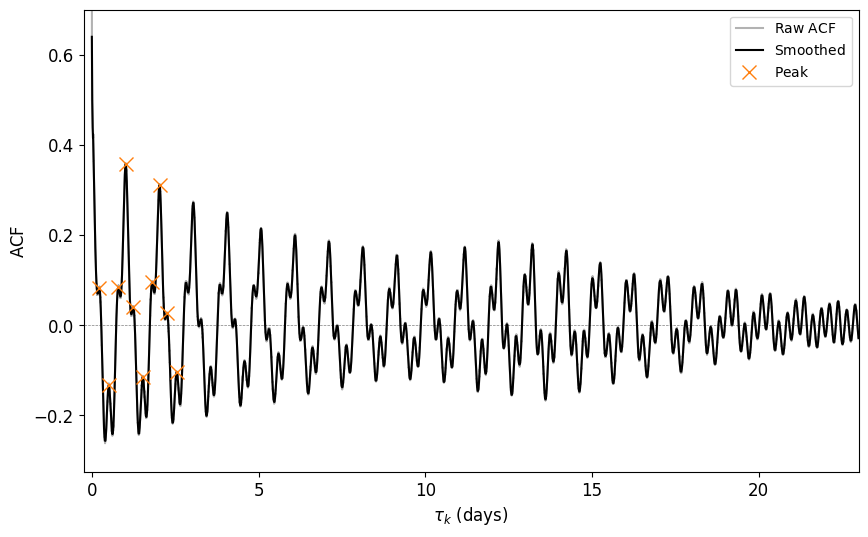

In [2]:

## Instantiate Rotator object, here it inherits from the Data attributes
rot = coPsi.Rotator(x=dat.x,y=dat.y)
## Calculate autocorrelation
rot.ACF()
## Smooth autocorrelation
rot.smoothACF(window=51)
## Grab peaks and estimate rotation period
rot.fromPeaks(prominence=(0.01),xmin=-0.25,xmax=dat.maxT,ymax=0.7)

This doesn't look too convincing. We seem to pick up on the ``double-dip'' features stemming from having more than one active region [(McQuillan et al. 2013)](https://ui.adsabs.harvard.edu/abs/2013MNRAS.432.1203M/abstract). This obviously results in us measuring a lower period than the actual stellar rotation period (~1.04 days, [Bieryla et al. 2024](https://ui.adsabs.harvard.edu/abs/2024MNRAS.52710955B/abstract)).
Adjusting the prominence can sometimes help (see [scipy.signal.find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)). 

Peaks found at:  [ 0.50835648  1.01254611  2.02925907  3.04180518  4.05712919  5.07523111
  6.09333302  7.11421284  8.13231476  9.15180562 10.16851859 11.1866205
 12.20194452 13.21587957 14.23537044 15.25208341 16.26324056 17.28412038
 18.30777811 19.32449107 20.34814879 21.36902861 23.40384349 24.42472331
 24.93307979 25.44004732 25.94979276 26.45676029 26.96650572 27.47625116
 28.49018621]
From median and MAD:
Prot = 1.0167+/-0.0011 d


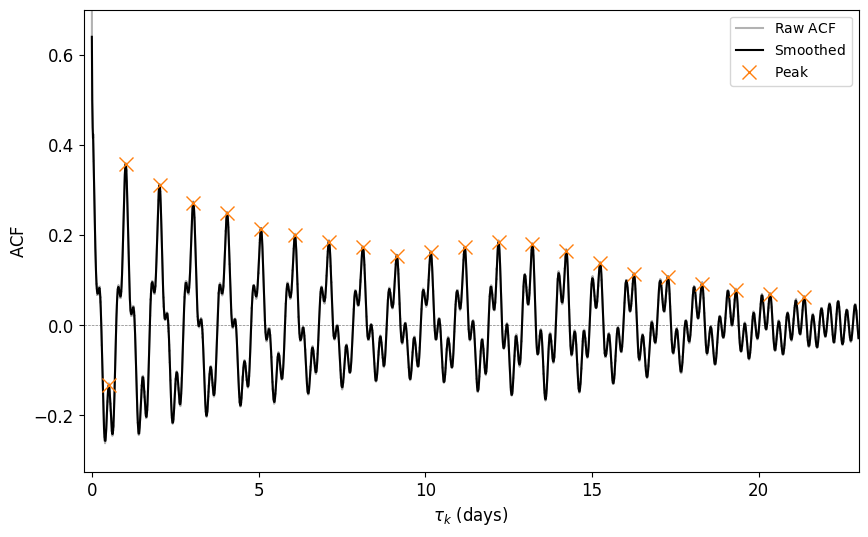

In [3]:
## Adjust prominence and maxpeaks to find the best rotation period
rot.fromPeaks(prominence=(0.1),maxpeaks=40,xmin=-0.25,xmax=dat.maxT,ymax=0.7)

That looks better! But we still seem to hit an early ``double-dip'', so maybe we should just pick the peaks ourselves.
We can do that manually by using `rot.pickPeaks`. 
However, we do need to have an interactive plot for that obviously.

In [4]:
%matplotlib qt
## Grab peaks manually and estimate rotation period
## Peaks are selected by clicking on the plot Mouse1 (event 1) to select, 
## Mouse3 (event 3) to deselect the latest peak, or Mouse2 (event 2) to remove all peaks
rot.pickPeaks(xmin=-0.25,xmax=dat.maxT,ymax=0.7)

The animation below shows the procedure:
Use mouse1 (event 1) to select, mouse3 (event 3) to deselect the latest peak, or mouse2 (event 2) to remove all peaks

![SegmentLocal](peakSelect.gif "segment")


Then after selecting those peaks we can once again plot and fit the 1st order polynomium.

In [ ]:
%matplotlib inline
if len(rot.peaks) > 1:
	rot.fromPeaks(rot.peaks,plot=True,poly=True,xmin=-0.25,xmax=dat.maxT,ymax=0.7)